# IS362 - Project 4

Your assignment is to:
• Start with the mushroom data in the pandas DataFrame that you constructed in your “Assignment –
Preprocessing Data with sci-kit learn.”
• Use scikit-learn to determine which of the two predictor columns that you selected (odor and one
other column of your choice) most accurately predicts whether or not a mushroom is poisonous. There is
an additional challenge here—to use scikit-learn’s predictive classifiers, you’ll want to convert each of
your two (numeric categorical) predictor columns into a set of columns. See for one approach pandas
get_dummies() method.
• Clearly state your conclusions along with any recommendations for further analysis.

First I'm going to start by recreating the dataframe we used for last week's assignment:

In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

mushroom_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',sep=',', header=None, usecols=[0,3,5,9], names=["Edible","Cap_Color","Odor","Gill_Color"])

mushroom_data.replace(to_replace={"Edible":{'p': 1, 'e': 0}}, inplace=True)
mushroom_data.replace(to_replace={"Cap_Color":{'n':0, 'b':1, 'c':2, 'g':3, 'r':4, 'p':5, 'u':6, 'e':7, 'w':8, 'y':9}}, inplace=True)
mushroom_data.replace(to_replace={"Odor":{'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8}}, inplace=True)
mushroom_data.replace(to_replace={"Gill_Color":{'k':0, 'n':1, 'b':2, 'h':3, 'g':4, 'r':5, 'o':6, 'p':7, 'u':8, 'e':9, 'w':10, 'y':11}}, inplace=True)

mushroom_data.head()

,Edible,Cap_Color,Odor,Gill_Color
0,1,0,7,0
1,0,9,0,0
2,0,8,1,1
3,1,8,7,1
4,0,3,6,0


What we want to know is which of these three mushroom traits, Cap Color, Odor, and Gill Color, are the best indicators of whether or not a mushroom is poisonous.

In [3]:
mushroom_data.groupby('Edible').count()

,Cap_Color,Odor,Gill_Color
Edible,,,
0,4208,4208,4208
1,3916,3916,3916


The first thing we see is that there are 4208 edible mushrooms contained in this data, and 3916 poisonous ones. If I'm guessing at random, I don't particularly like those odds. 

In [6]:
mushroom_data.groupby(['Edible', 'Odor']).count()

Cap_Color  Gill_Color
Edible Odor                       
0      0           400         400
       1           400         400
       6          3408        3408
1      2           192         192
       3           576         576
       4          2160        2160
       5            36          36
       6           120         120
       7           256         256
       8           576         576

In this grouping, we get a bit more information. Edible mushrooms have one of three odors, and only one of those odors is shared by the poisonous mushrooms. Most of the odors listed, therefore, are an indication that a mushroom is poisonous. We noticed the same thing last week through this graph:

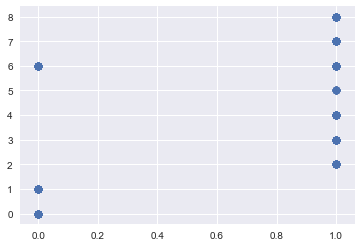

In [7]:
x = mushroom_data["Edible"].values
y = mushroom_data["Odor"].values

plt.scatter(x,y)

While a mushroom that does not have an odor at all, unless the odor emanating from the mushroom is either almond or anise, don't eat the mushroom.

That said, since I don't regularly go around sniffing mushrooms, I'm not entirely sure how practical of an identification method that would be for the average person. With that in mind, we'll examine the other traits as well.

In [8]:
mushroom_data.groupby(['Edible', 'Cap_Color']).count()

Odor  Gill_Color
Edible Cap_Color                  
0      0          1264        1264
       1            48          48
       2            32          32
       3          1032        1032
       4            16          16
       5            56          56
       6            16          16
       7           624         624
       8           720         720
       9           400         400
1      0          1020        1020
       1           120         120
       2            12          12
       3           808         808
       5            88          88
       7           876         876
       8           320         320
       9           672         672

Here again, grouping the data reinforces what we highlighted graphically in last week's assignment. Two categories, 4 and 6, which refer to a green or purple cap color, only appear in the "edible" category, meaning that there are no poisonous mushrooms of that color.

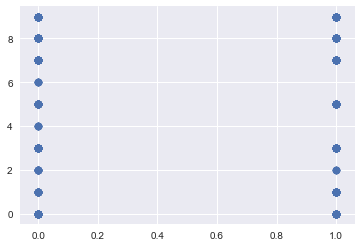

In [10]:
x = mushroom_data["Edible"].values
y = mushroom_data["Cap_Color"].values

plt.scatter(x,y)

In [9]:
mushroom_data.groupby(['Edible', 'Gill_Color']).count()

Cap_Color  Odor
Edible Gill_Color                 
0      0                 344   344
       1                 936   936
       3                 204   204
       4                 248   248
       6                  64    64
       7                 852   852
       8                 444   444
       9                  96    96
       10                956   956
       11                 64    64
1      0                  64    64
       1                 112   112
       2                1728  1728
       3                 528   528
       4                 504   504
       5                  24    24
       7                 640   640
       8                  48    48
       10                246   246
       11                 22    22

Here we can determine that mushrooms whose gill color is 6 (orange) or or 9 (red) are not going to be poisonous, and that mushrooms with a gill color of 3 (chocolate) or 5 (green) will always be poisonous, as there are no edible mushrooms with that color.

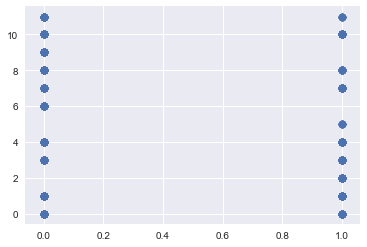

In [11]:
x = mushroom_data["Edible"].values
y = mushroom_data["Gill_Color"].values

plt.scatter(x,y)

With all of this in mind, it seems that odor is statistically the best predictor of whether a mushroom is poisonous, because it has the least crossover between categories. For the various color categories, most colors appear in both categories - if a mushroom is pink, you're not granted any additional insight into what that may mean as far as how poisonous the mushroom is. With odor, however, as long as the mushroom has SOME odor, you can quickly determine whether it falls into the edible category, or the poisonous category.